In [39]:
import findspark
findspark.init()
import pyspark
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

In [30]:
import pandas as pd

In [2]:
spark = pyspark.sql.SparkSession.builder.appName('LinearRegressiom').getOrCreate()

In [52]:
data = spark.read.csv('old/regression.txt', header=False, inferSchema=True)
data = data.withColumnRenamed('_c0', 'X').withColumnRenamed('_c1','Y')
data.show(5)

+-----+-----+
|    X|    Y|
+-----+-----+
|-1.74| 1.66|
| 1.24|-1.18|
| 0.29| -0.4|
|-0.13| 0.09|
|-0.39| 0.38|
+-----+-----+
only showing top 5 rows



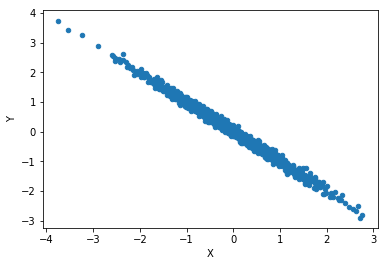

In [54]:
pddata = data.toPandas()
pddata.plot.scatter('X', 'Y')
plt.show()

In [55]:
(train, test) = data.randomSplit([0.7, 0.3])

In [56]:
lr = LinearRegression(featuresCol='feature', labelCol='Y', maxIter=20,
                     regParam=0.3, elasticNetParam=0.8)

In [57]:
vecAssembler = VectorAssembler(inputCols=['X'], outputCol='feature')
train = vecAssembler.transform(train)
test = vecAssembler.transform(test)

In [58]:
model = lr.fit(train)

In [59]:
predictions = model.transform(test)

In [60]:
predictions.show(10)

+-----+----+-------+------------------+
|    X|   Y|feature|        prediction|
+-----+----+-------+------------------+
|-2.54|2.39|[-2.54]| 1.793513706148315|
|-2.54|2.49|[-2.54]| 1.793513706148315|
|-2.36|2.63|[-2.36]|1.6657954109977913|
|-2.17|2.19|[-2.17]|1.5309816550055717|
|-2.06|1.95|[-2.06]|1.4529315857469185|
|-1.98| 2.1|[-1.98]|1.3961678990133524|
|-1.96|1.98|[-1.96]|1.3819769773299608|
|-1.94|1.94|[-1.94]|1.3677860556465693|
|-1.91|1.86|[-1.91]| 1.346499673121482|
|-1.88|1.89|[-1.88]|1.3252132905963947|
+-----+----+-------+------------------+
only showing top 10 rows



In [62]:
pddata = predictions.select('Y', 'prediction').toPandas()

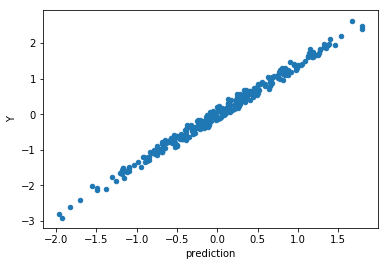

In [63]:
pddata.plot.scatter('prediction', 'Y')
plt.show()

In [64]:
spark.stop()